## Proje-4 Meyve Sebze Sınıflandırma

### Kütüphanelerin yüklenmesi

In [1]:
# Kütüphaneler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# Machine Learning
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verileri Yükleyelim

Buradaki veri seti çok büyük. 
<a href="https://www.kaggle.com/moltean/fruits"> Buradan indirilebilir.</a>

In [2]:
# veriyi aktaralım 
egitim_yolu = "/DATA/datasets/Fruits/fruits-360_dataset/fruits-360/Training/"
test_yolu = "/DATA/datasets/Fruits/fruits-360_dataset/fruits-360/Test/"

### Örnek bir görsele bakalım

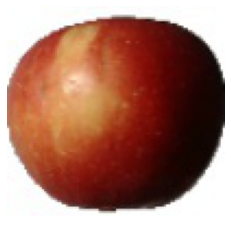

In [3]:
# resim görseli
resim = load_img(egitim_yolu + "Apple Braeburn/0_100.jpg")
plt.figure()
plt.imshow(resim)
plt.axis("off")
plt.show()

### Resimlerin şekline bakabilmek için array haline getirelim

In [4]:
# resimlerin şekline bakabilmek için array'a çevirelim.
x = img_to_array(resim)
print("Resimlerin Şekli : ", x.shape)

Resimlerin Şekli :  (100, 100, 3)


### Sınıf sayısı

In [5]:
# sınıf sayısı
sinif_ismi = glob(egitim_yolu + "/*")
sinif_sayisi = len(sinif_ismi)
print("Eşsiz sınıf sayısı : ", sinif_sayisi)

Eşsiz sınıf sayısı :  131


### Evrişimsel Sinir Ağı Modeli

In [11]:
# Modelin tabanı
model = Sequential()
# Özellik çıkarma
model.add(Conv2D(32, (3, 3), input_shape = x.shape)) # evrişim katmanı
model.add(Activation("relu")) # relu aktivasyon
model.add(MaxPooling2D()) # pixel ekleme katmanı

model.add(Conv2D(32, (3, 3))) # evrişim katmanı
model.add(Activation("relu")) # relu aktivasyon
model.add(MaxPooling2D()) # pixel ekleme katmanı

model.add(Conv2D(64, (3, 3))) # evrişim katmanı
model.add(Activation("relu")) # relu aktivasyon
model.add(MaxPooling2D()) # pixel ekleme katmanı

# sınıflandırma bölümü
model.add(Flatten()) # düzleştirme
model.add(Dense(1024)) # gizli katman 1024 sinir hücresi
model.add(Activation("relu")) # relu aktivasyon
model.add(Dropout(0.5)) # seyreltme
model.add(Dense(sinif_sayisi)) # output
model.add(Activation("softmax")) # softmax fonksiyonu multi sınıflar için


In [12]:
# modeli derleyelim
model.compile(loss = "categorical_crossentropy",
    optimizer = "rmsprop", metrics = ["accuracy"])

In [13]:
# Eğitim ve test
batch_size = 32
# resim oluşturucu
train_datagen = ImageDataGenerator(rescale = 1. / 255,
    shear_range = 0.3, horizontal_flip = True, zoom_range = 0.3)
# Eğitim verisi oluşturalım
train_generator = train_datagen.flow_from_directory(
    egitim_yolu, target_size = x.shape[:2],
    batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.


In [15]:
# resim oluşturucu
test_datagen = ImageDataGenerator(rescale = 1. / 255,
    shear_range = 0.3, horizontal_flip = True, zoom_range = 0.3)
# test verisi oluşturalım
test_generator = test_datagen.flow_from_directory(
    test_yolu, target_size = x.shape[:2],
    batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 22688 images belonging to 131 classes.


In [17]:
tarih = model.fit_generator(generator = train_generator,
    steps_per_epoch = 1600 // batch_size,
    epochs = 50, validation_data = test_generator,
    validation_steps = 800 // batch_size)

Epoch 1/50
50/50 [==============================] - 17s 323ms/step - loss: 4.7010 - accuracy: 0.0319 - val_loss: 4.5115 - val_accuracy: 0.0338
Epoch 2/50
50/50 [==============================] - 17s 347ms/step - loss: 3.8555 - accuracy: 0.1006 - val_loss: 3.3526 - val_accuracy: 0.1625
Epoch 3/50
50/50 [==============================] - 17s 350ms/step - loss: 3.2336 - accuracy: 0.1700 - val_loss: 2.6803 - val_accuracy: 0.2738
Epoch 4/50
50/50 [==============================] - 17s 350ms/step - loss: 2.6083 - accuracy: 0.2788 - val_loss: 2.3286 - val_accuracy: 0.3550
Epoch 5/50
50/50 [==============================] - 17s 349ms/step - loss: 2.2765 - accuracy: 0.3331 - val_loss: 1.8230 - val_accuracy: 0.4925
Epoch 6/50
50/50 [==============================] - 17s 347ms/step - loss: 1.8535 - accuracy: 0.4475 - val_loss: 1.8015 - val_accuracy: 0.4625
Epoch 7/50
50/50 [==============================] - 17s 347ms/step - loss: 1.6672 - accuracy: 0.5013 - val_loss: 1.5699 - val_accuracy: 0.5688